## Business Context

The Census of India is a comprehensive decennial exercise that provides extensive data on various demographic and socio-economic parameters of the country. The 2011 Census, specifically the Primary Census Abstract (PCA) for female-headed households excluding institutional households, offers valuable insights into the demographic profile, literacy rates, workforce participation, and living conditions of female-headed households across different states and districts of India. This data is crucial for policymakers, government agencies, social researchers, and non-governmental organizations (NGOs) to understand the socio-economic status of female-headed households and to formulate policies and interventions aimed at their upliftment and development.

## Objective

The objective of this analysis is to perform detailed Exploratory Data Analysis (EDA) and Principal Component Analysis (PCA) on the PCA dataset for female-headed households excluding institutional households from the 2011 Census. The goals are as follows:

1.Exploratory Data Analysis (EDA)

2.Principal Component Analysis (PCA)




# Data Dictionary:

Name: Description

State: State Code

District: District Code

Name: Name

TRU1: Area Name

No_HH: No of Household

TOT_M: Total population Male

TOT_F: Total population Female

M_06: Population in the age group 0-6 Male

F_06: Population in the age group 0-6 Female

M_SC: Scheduled Castes population Male

F_SC: Scheduled Castes population Female

M_ST: Scheduled Tribes population Male

F_ST: Scheduled Tribes population Female

M_LIT: Literates population Male

F_LIT: Literates population Female

M_ILL: Illiterate Male

F_ILL: Illiterate Female

TOT_WORK_M: Total Worker Population Male

TOT_WORK_F: Total Worker Population Female

MAINWORK_M: Main Working Population Male

MAINWORK_F: Main Working Population Female

MAIN_CL_M: Main Cultivator Population Male

MAIN_CL_F: Main Cultivator Population Female

MAIN_AL_M: Main Agricultural Labourers Population Male

MAIN_AL_F: Main Agricultural Labourers Population Female

MAIN_HH_M: Main Household Industries Population Male

MAIN_HH_F: Main Household Industries Population Female

MAIN_OT_M: Main Other Workers Population Male

MAIN_OT_F: Main Other Workers Population Female

MARGWORK_M: Marginal Worker Population Male

MARGWORK_F: Marginal Worker Population Female

MARG_CL_M: Marginal Cultivator Population Male

MARG_CL_F: Marginal Cultivator Population Female

MARG_AL_M: Marginal Agriculture Labourers Population Male

MARG_AL_F: Marginal Agriculture Labourers Population Female

MARG_HH_M: Marginal Household Industries Population Male

MARG_HH_F: Marginal Household Industries Population Female

MARG_OT_M: Marginal Other Workers Population Male

MARG_OT_F: Marginal Other Workers Population Female

MARGWORK_3_6_M: Marginal Worker Population 3-6 Male

MARGWORK_3_6_F: Marginal Worker Population 3-6 Female

MARG_CL_3_6_M: Marginal Cultivator Population 3-6 Male

MARG_CL_3_6_F: Marginal Cultivator Population 3-6 Female

MARG_AL_3_6_M: Marginal Agriculture Labourers Population 3-6 Male

MARG_AL_3_6_F: Marginal Agriculture Labourers Population 3-6 Female

MARG_HH_3_6_M: Marginal Household Industries Population 3-6 Male

MARG_HH_3_6_F: Marginal Household Industries Population 3-6 Female

MARG_OT_3_6_M: Marginal Other Workers Population Person 3-6 Male

MARG_OT_3_6_F: Marginal Other Workers Population Person 3-6 Female

MARGWORK_0_3_M: Marginal Worker Population 0-3 Male

MARGWORK_0_3_F: Marginal Worker Population 0-3 Female

MARG_CL_0_3_M: Marginal Cultivator Population 0-3 Male

MARG_CL_0_3_F: Marginal Cultivator Population 0-3 Female

MARG_AL_0_3_M: Marginal Agriculture Labourers Population 0-3 Male

MARG_AL_0_3_F: Marginal Agriculture Labourers Population 0-3 Female

MARG_HH_0_3_M: Marginal Household Industries Population 0-3 Male

MARG_HH_0_3_F: Marginal Household Industries Population 0-3 Female

MARG_OT_0_3_M: Marginal Other Workers Population 0-3 Male

MARG_OT_0_3_F: Marginal Other Workers Population 0-3 Female

NON_WORK_M: Non Working Population Male

NON_WORK_F: Non Working Population Female

 # Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
# load the dataset
df = pd.read_excel("C:/Users/AKHIL MOHANDAS/Documents/Study_Material/Project 4/PCA+India+Data_Census.xlsx",sheet_name='data')

### Displaying a few rows (head and tail)

In [3]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


## Shape of Data

In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  640 
no. of columns:  61


## Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

59 integer variables and 2 cateogorical variables.

## Statistical summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


Since the dataset has 640 rows, it is difficult to derive conclusions. Hence, we will select 5 variables to perform EDA. However, PCA will be completed on the entire dataset.

### Checking for null values and duplicates

In [8]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [9]:
df.duplicated().sum()

0

## EDA

five selected variables :

TOT_M: Total population Male
    
TOT_F: Total population Female
    
M_LIT: Literate Male
    
F_LIT: Literate Female
    
No_HH: Number of Households

## UNIVARIATE ANALYSIS

In [10]:
df1=df[['TOT_M', 'TOT_F', 'M_LIT', 'F_LIT', 'No_HH']]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TOT_M   640 non-null    int64
 1   TOT_F   640 non-null    int64
 2   M_LIT   640 non-null    int64
 3   F_LIT   640 non-null    int64
 4   No_HH   640 non-null    int64
dtypes: int64(5)
memory usage: 25.1 KB


In [12]:
df1.isnull().sum()

TOT_M    0
TOT_F    0
M_LIT    0
F_LIT    0
No_HH    0
dtype: int64

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0
F_LIT,640.0,66359.565625,75037.860207,371.0,20932.00,43796.5,84799.75,571140.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0


We notice the data is not scaled.

The average of male population is less than female population.

The average of male population who is literate is less than female literate population.

## Univariate Analysis

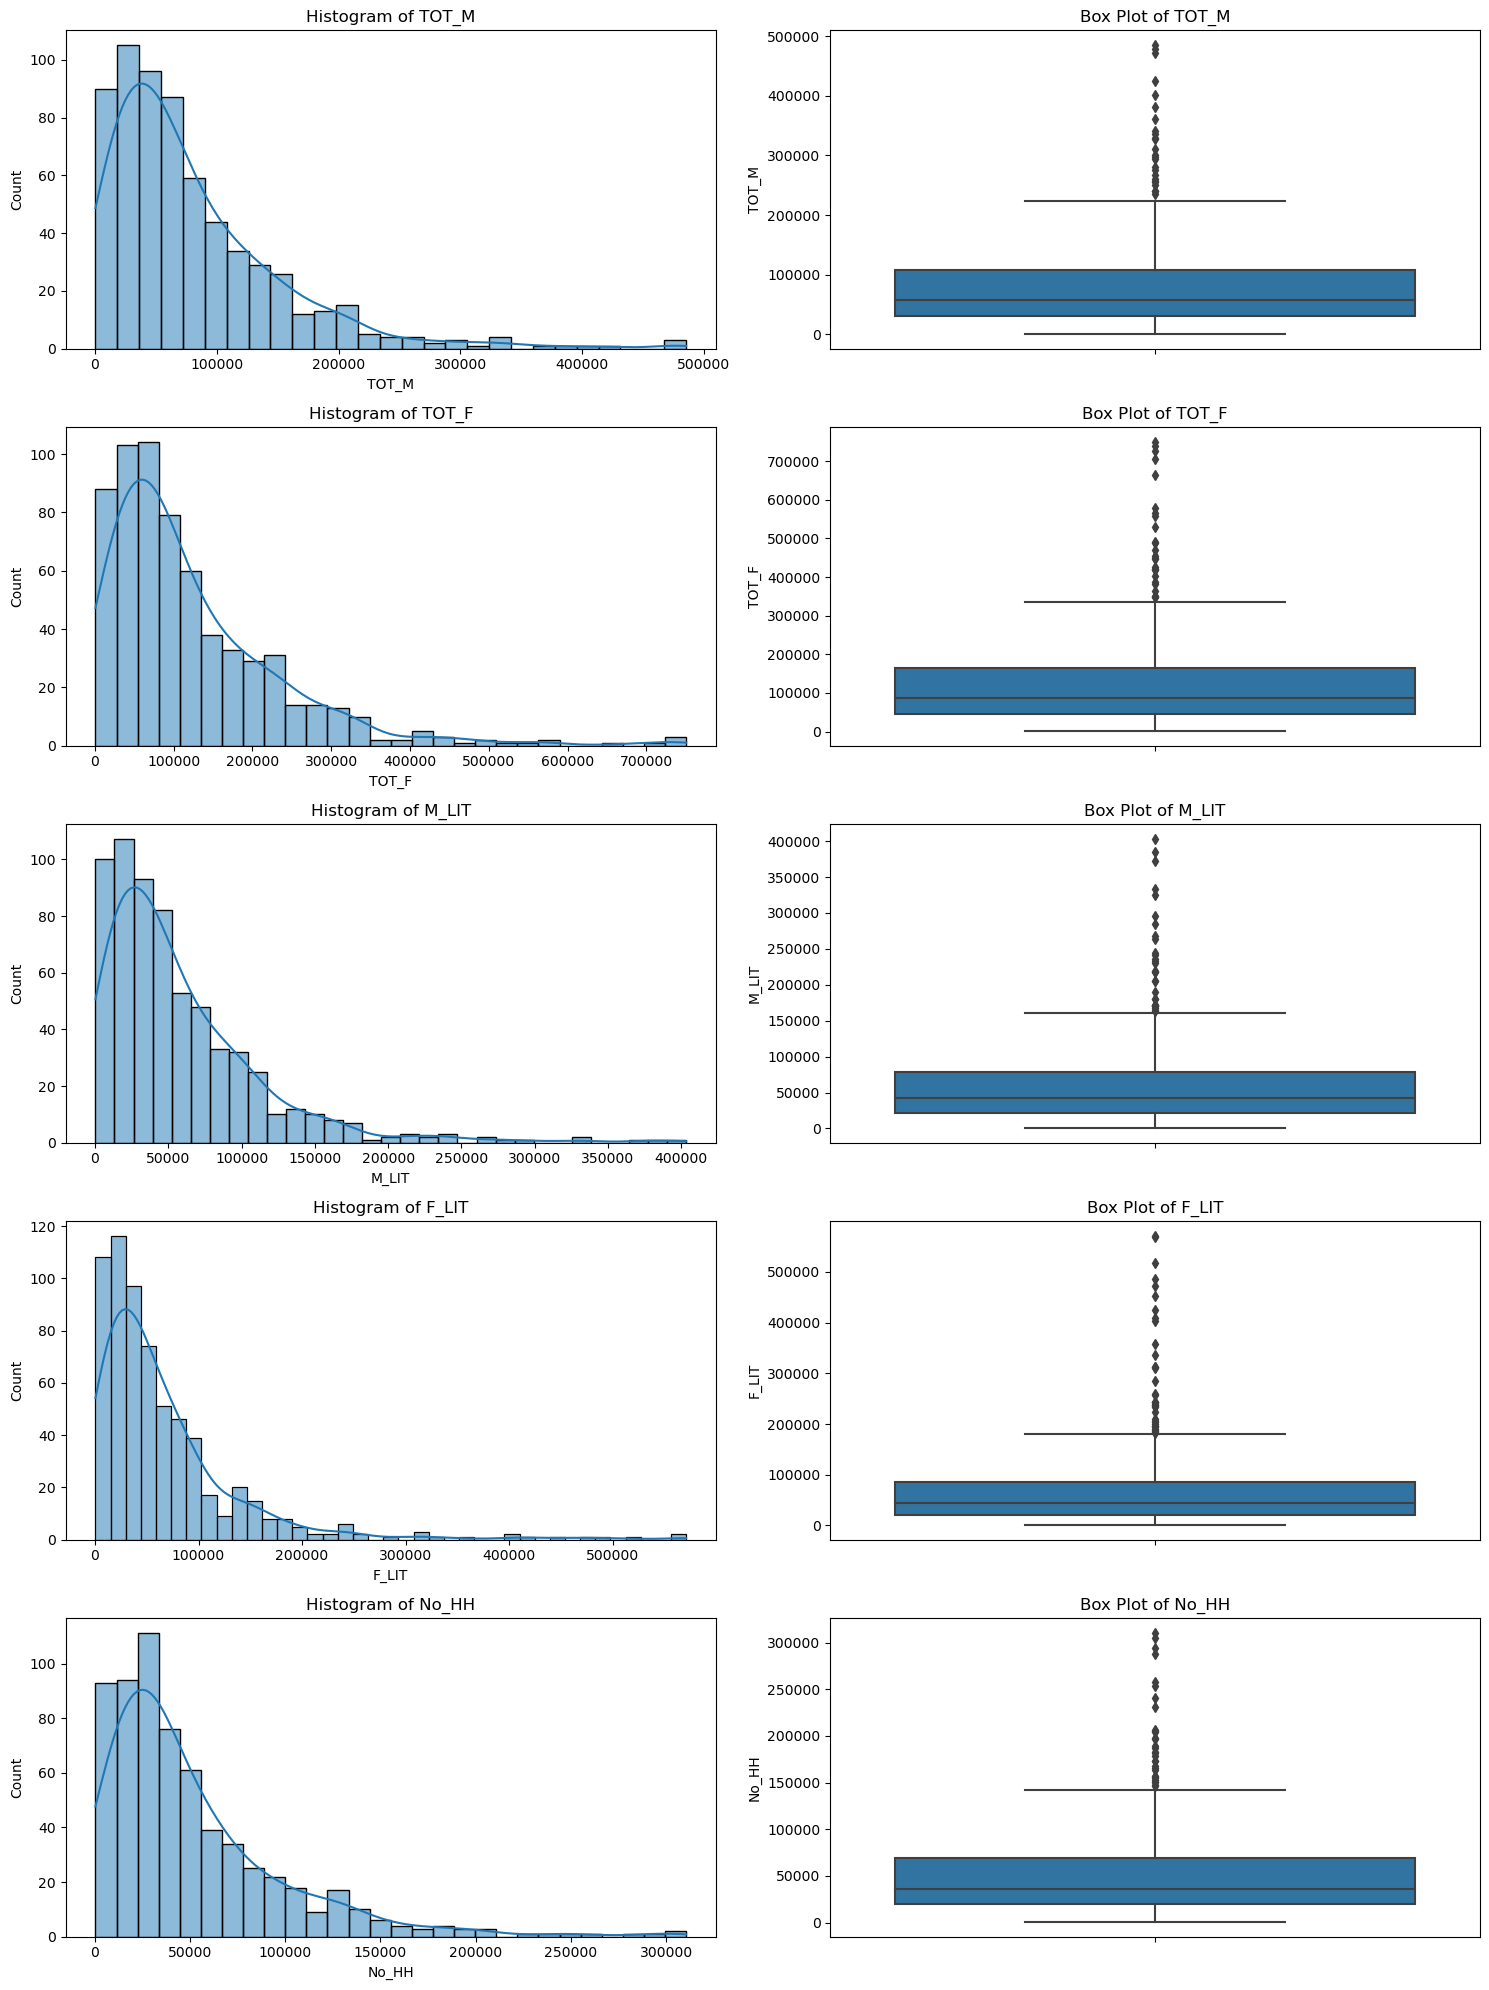

In [14]:

columns = ['TOT_M', 'TOT_F', 'M_LIT', 'F_LIT', 'No_HH']


plt.figure(figsize=(15, 20))

for i, col in enumerate(columns):
    plt.subplot(len(columns), 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(columns), 2, 2*i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

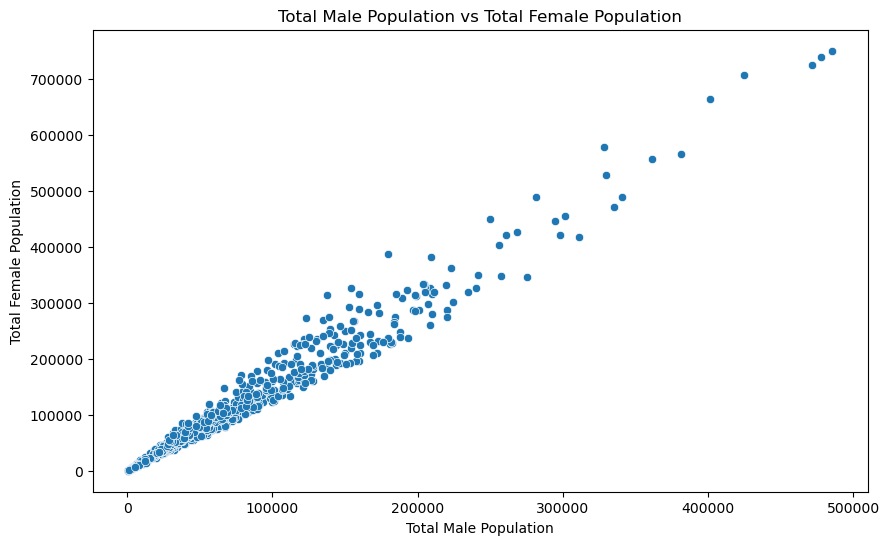

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOT_M', y='TOT_F', data=df1)
plt.title('Total Male Population vs Total Female Population')
plt.xlabel('Total Male Population')
plt.ylabel('Total Female Population')
plt.show()

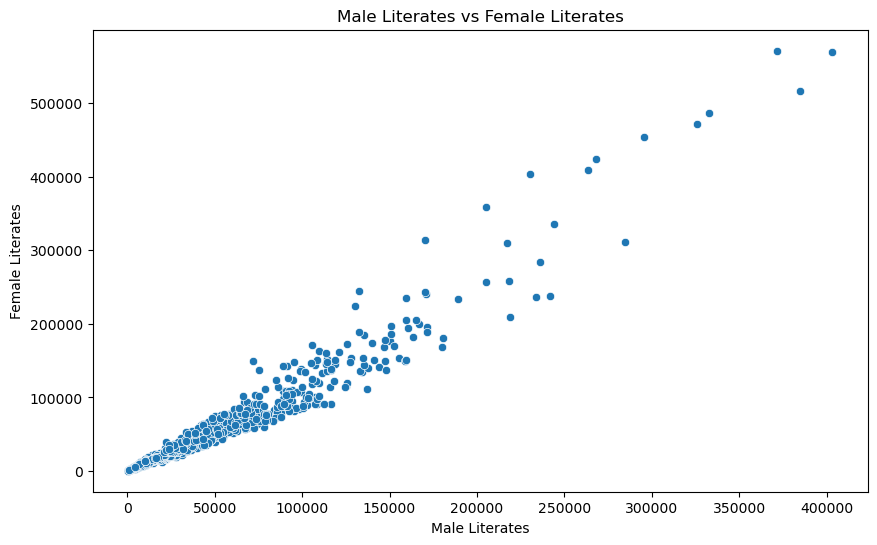

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='M_LIT', y='F_LIT', data=df1)
plt.title('Male Literates vs Female Literates')
plt.xlabel('Male Literates')
plt.ylabel('Female Literates')
plt.show()

###### Which state has highest gender ratio and which has the lowest?

In [17]:
df1=df.copy()

In [18]:
df1['Gender_Ratio'] = (df1['TOT_M'] / df1['TOT_F']) * 100

In [19]:
state_gender_ratio = df1.groupby('State')['Gender_Ratio'].mean().reset_index()
highest_gender_ratio_state = state_gender_ratio.loc[state_gender_ratio['Gender_Ratio'].idxmax()]
lowest_gender_ratio_state = state_gender_ratio.loc[state_gender_ratio['Gender_Ratio'].idxmin()]

print(f"State with highest gender ratio: {highest_gender_ratio_state['State']}")
print(f"State with lowest gender ratio: {lowest_gender_ratio_state['State']}")


State with highest gender ratio: Lakshadweep
State with lowest gender ratio: Andhra Pradesh


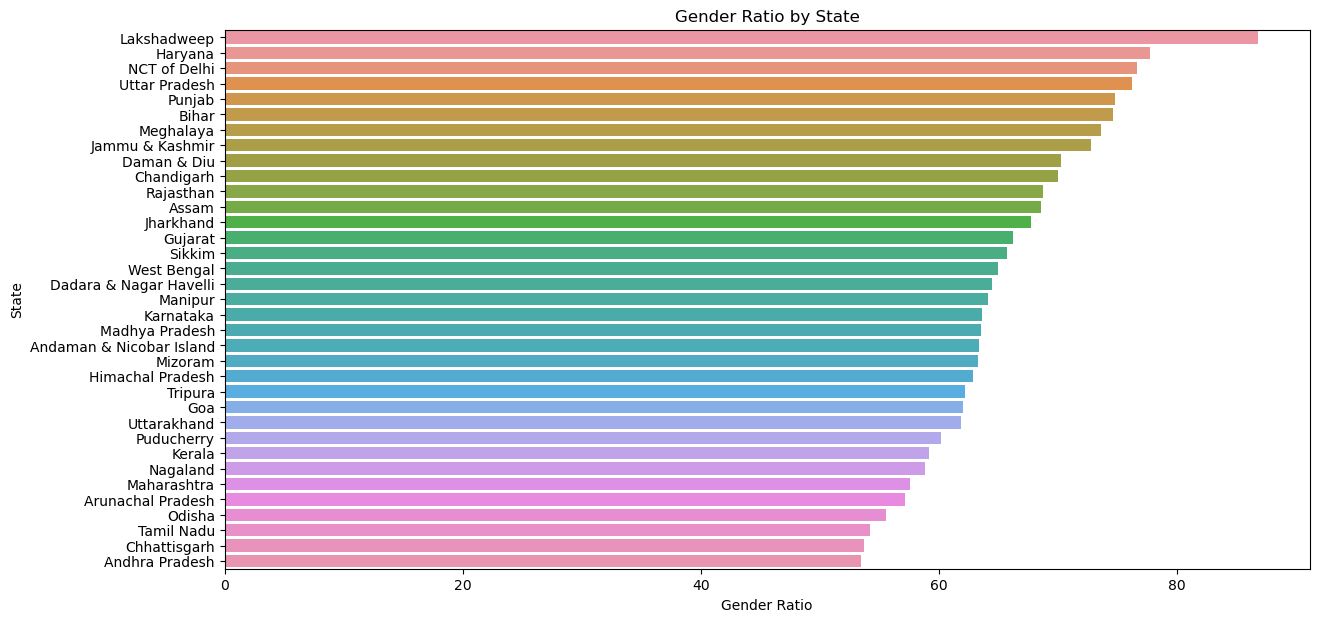

In [20]:
plt.figure(figsize=(14, 7))

sns.barplot(x='Gender_Ratio', y='State', data=state_gender_ratio.sort_values(by='Gender_Ratio', ascending=False))
plt.title('Gender Ratio by State')
plt.xlabel('Gender Ratio')
plt.ylabel('State')
plt.show()

###### Which district has the highest & lowest gender ratio?

In [21]:
highest_gender_ratio_district = df1.loc[df1['Gender_Ratio'].idxmax()]
lowest_gender_ratio_district = df1.loc[df1['Gender_Ratio'].idxmin()]

print(f"District with highest gender ratio: {highest_gender_ratio_district['Area Name']}")
print(f"District with lowest gender ratio: {lowest_gender_ratio_district['Area Name']}")

District with highest gender ratio: Lakshadweep
District with lowest gender ratio: Krishna


### Outlier Detection

###### Data Visualization before scaling and outlier treatment:

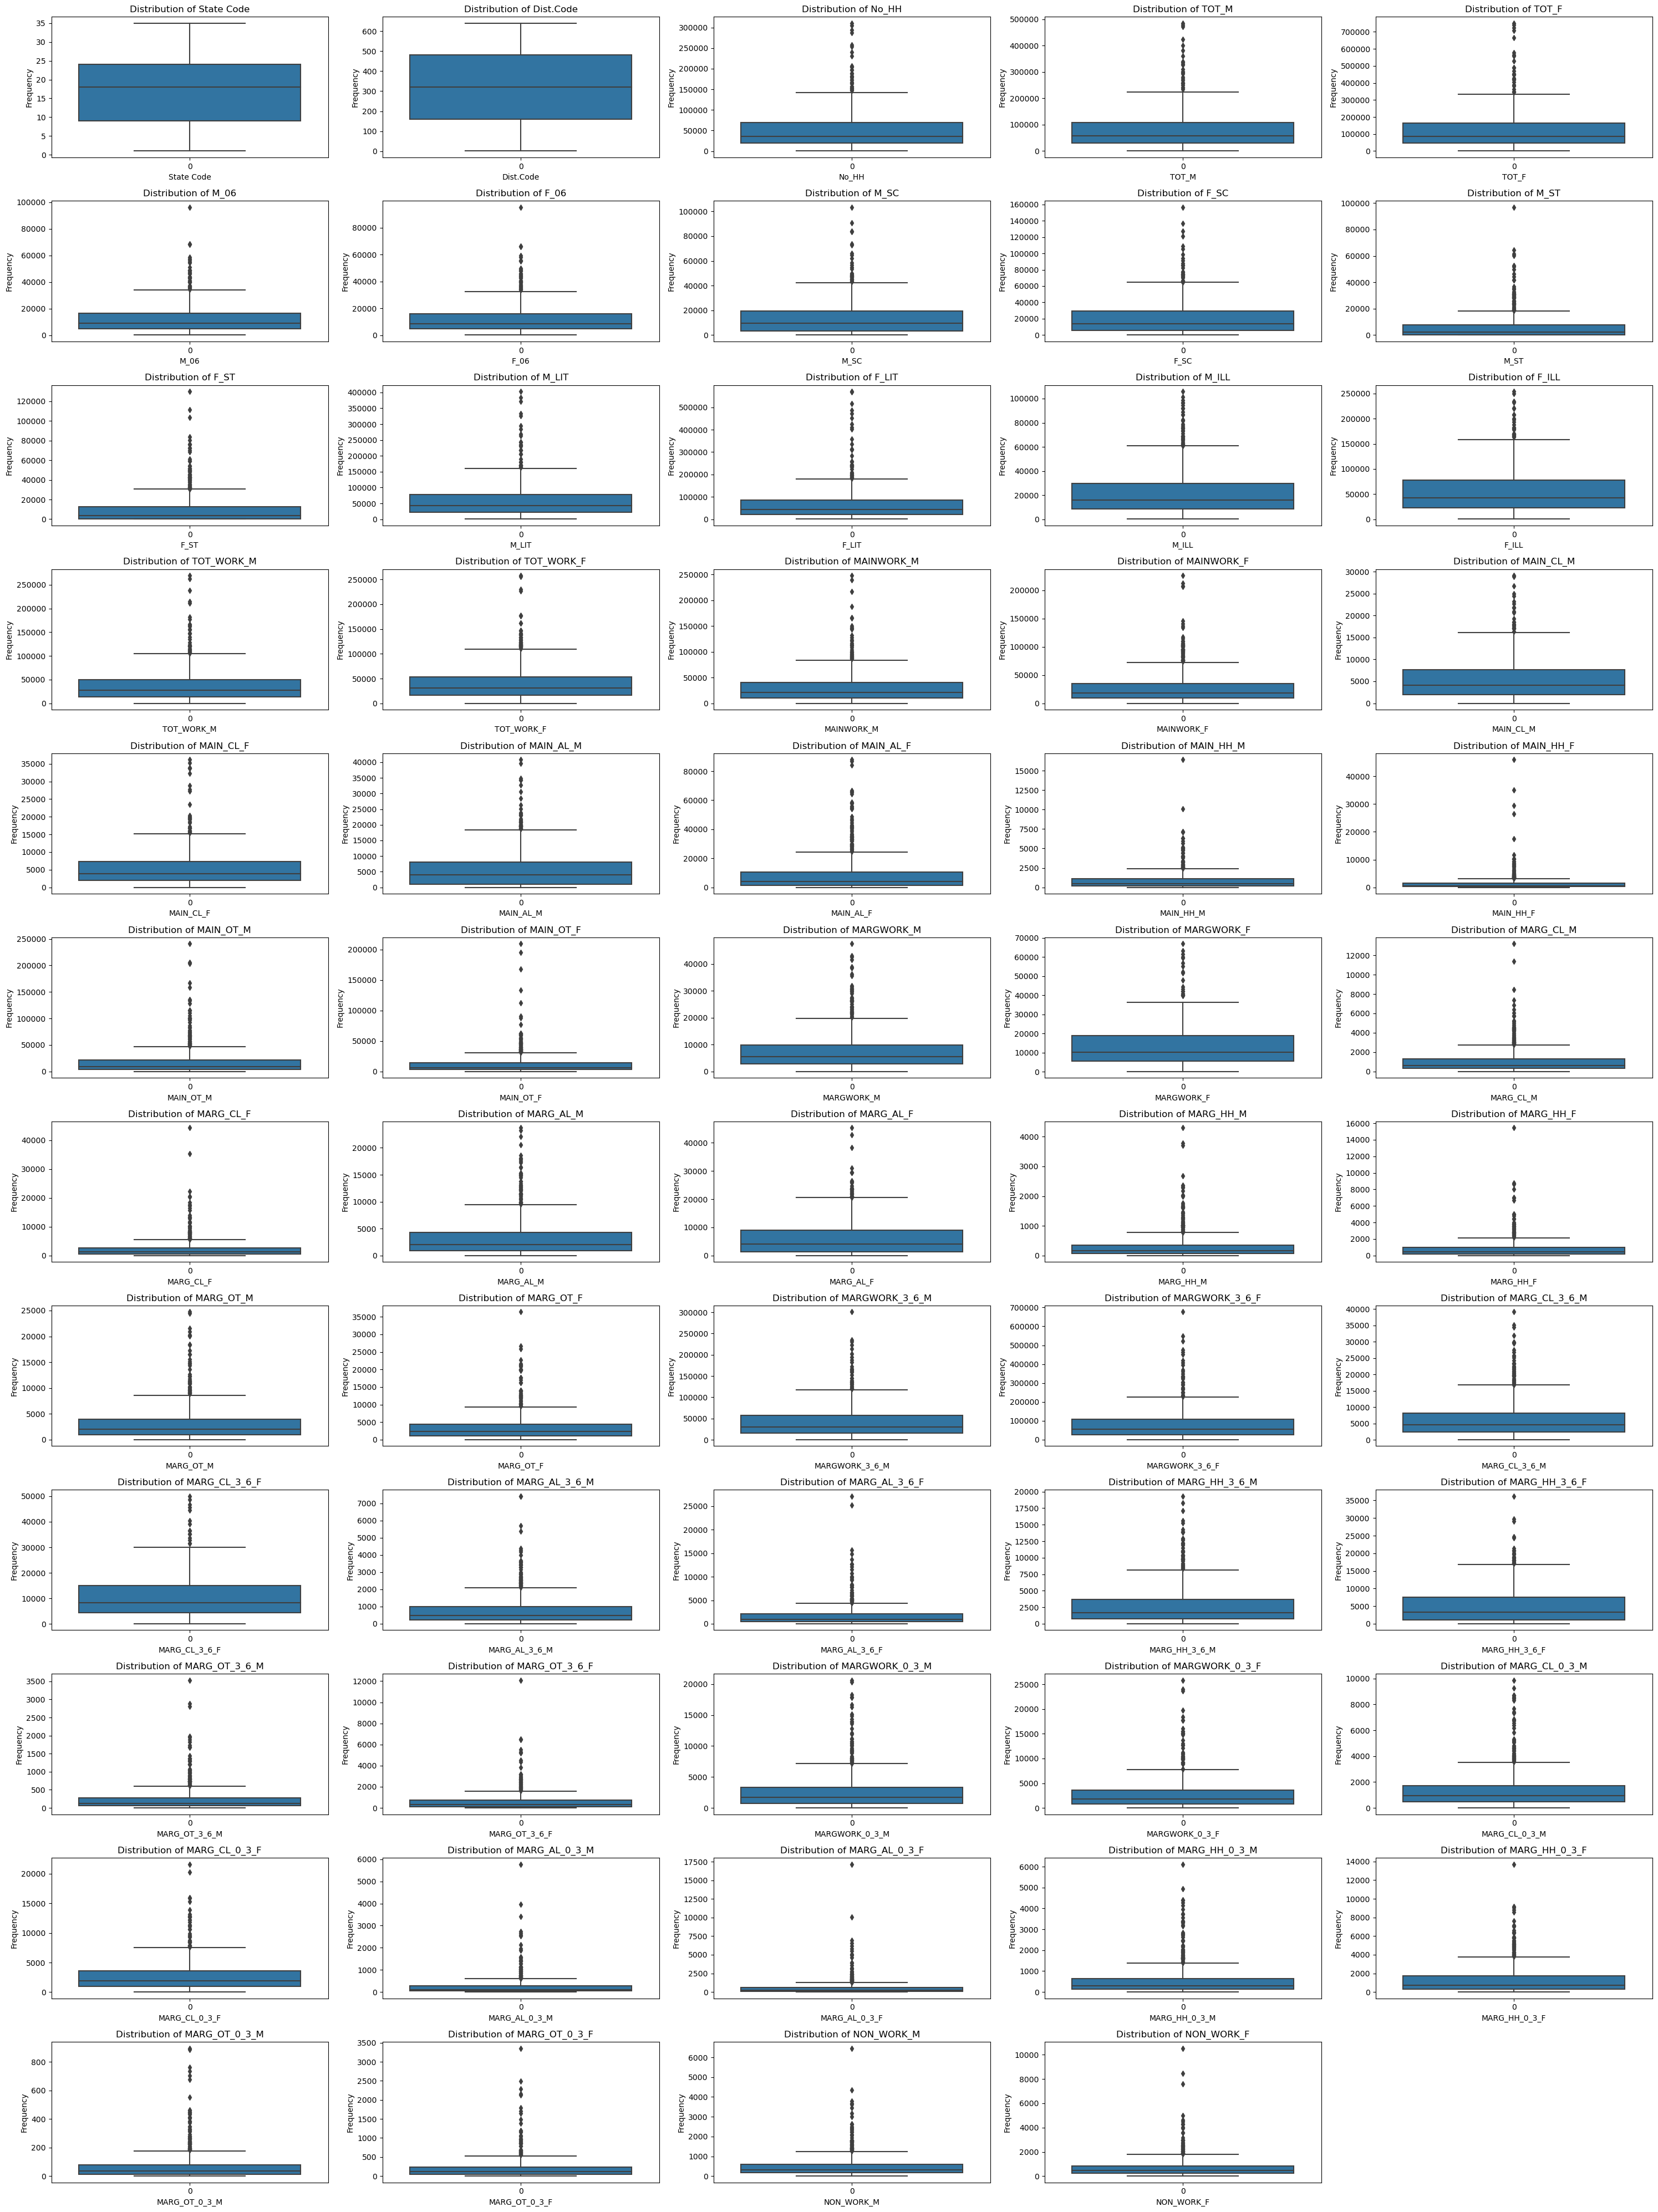

In [22]:
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(30, 40))


n_cols = 5


for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // n_cols + 1, n_cols, i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

Outliers can also distort the results of clustering. Therefore, it is important to identify and treat outliers. This can be done using various methods such as z-score, IQR method, etc. We had seen in above that most of the variables had outliers. We have treated outlier using quantile-based flooring and capping.

In [23]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

#Cap & floor the values beyond the outlier boundaries
for i in numerical_columns:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

###### Data visualization after outlier treatment

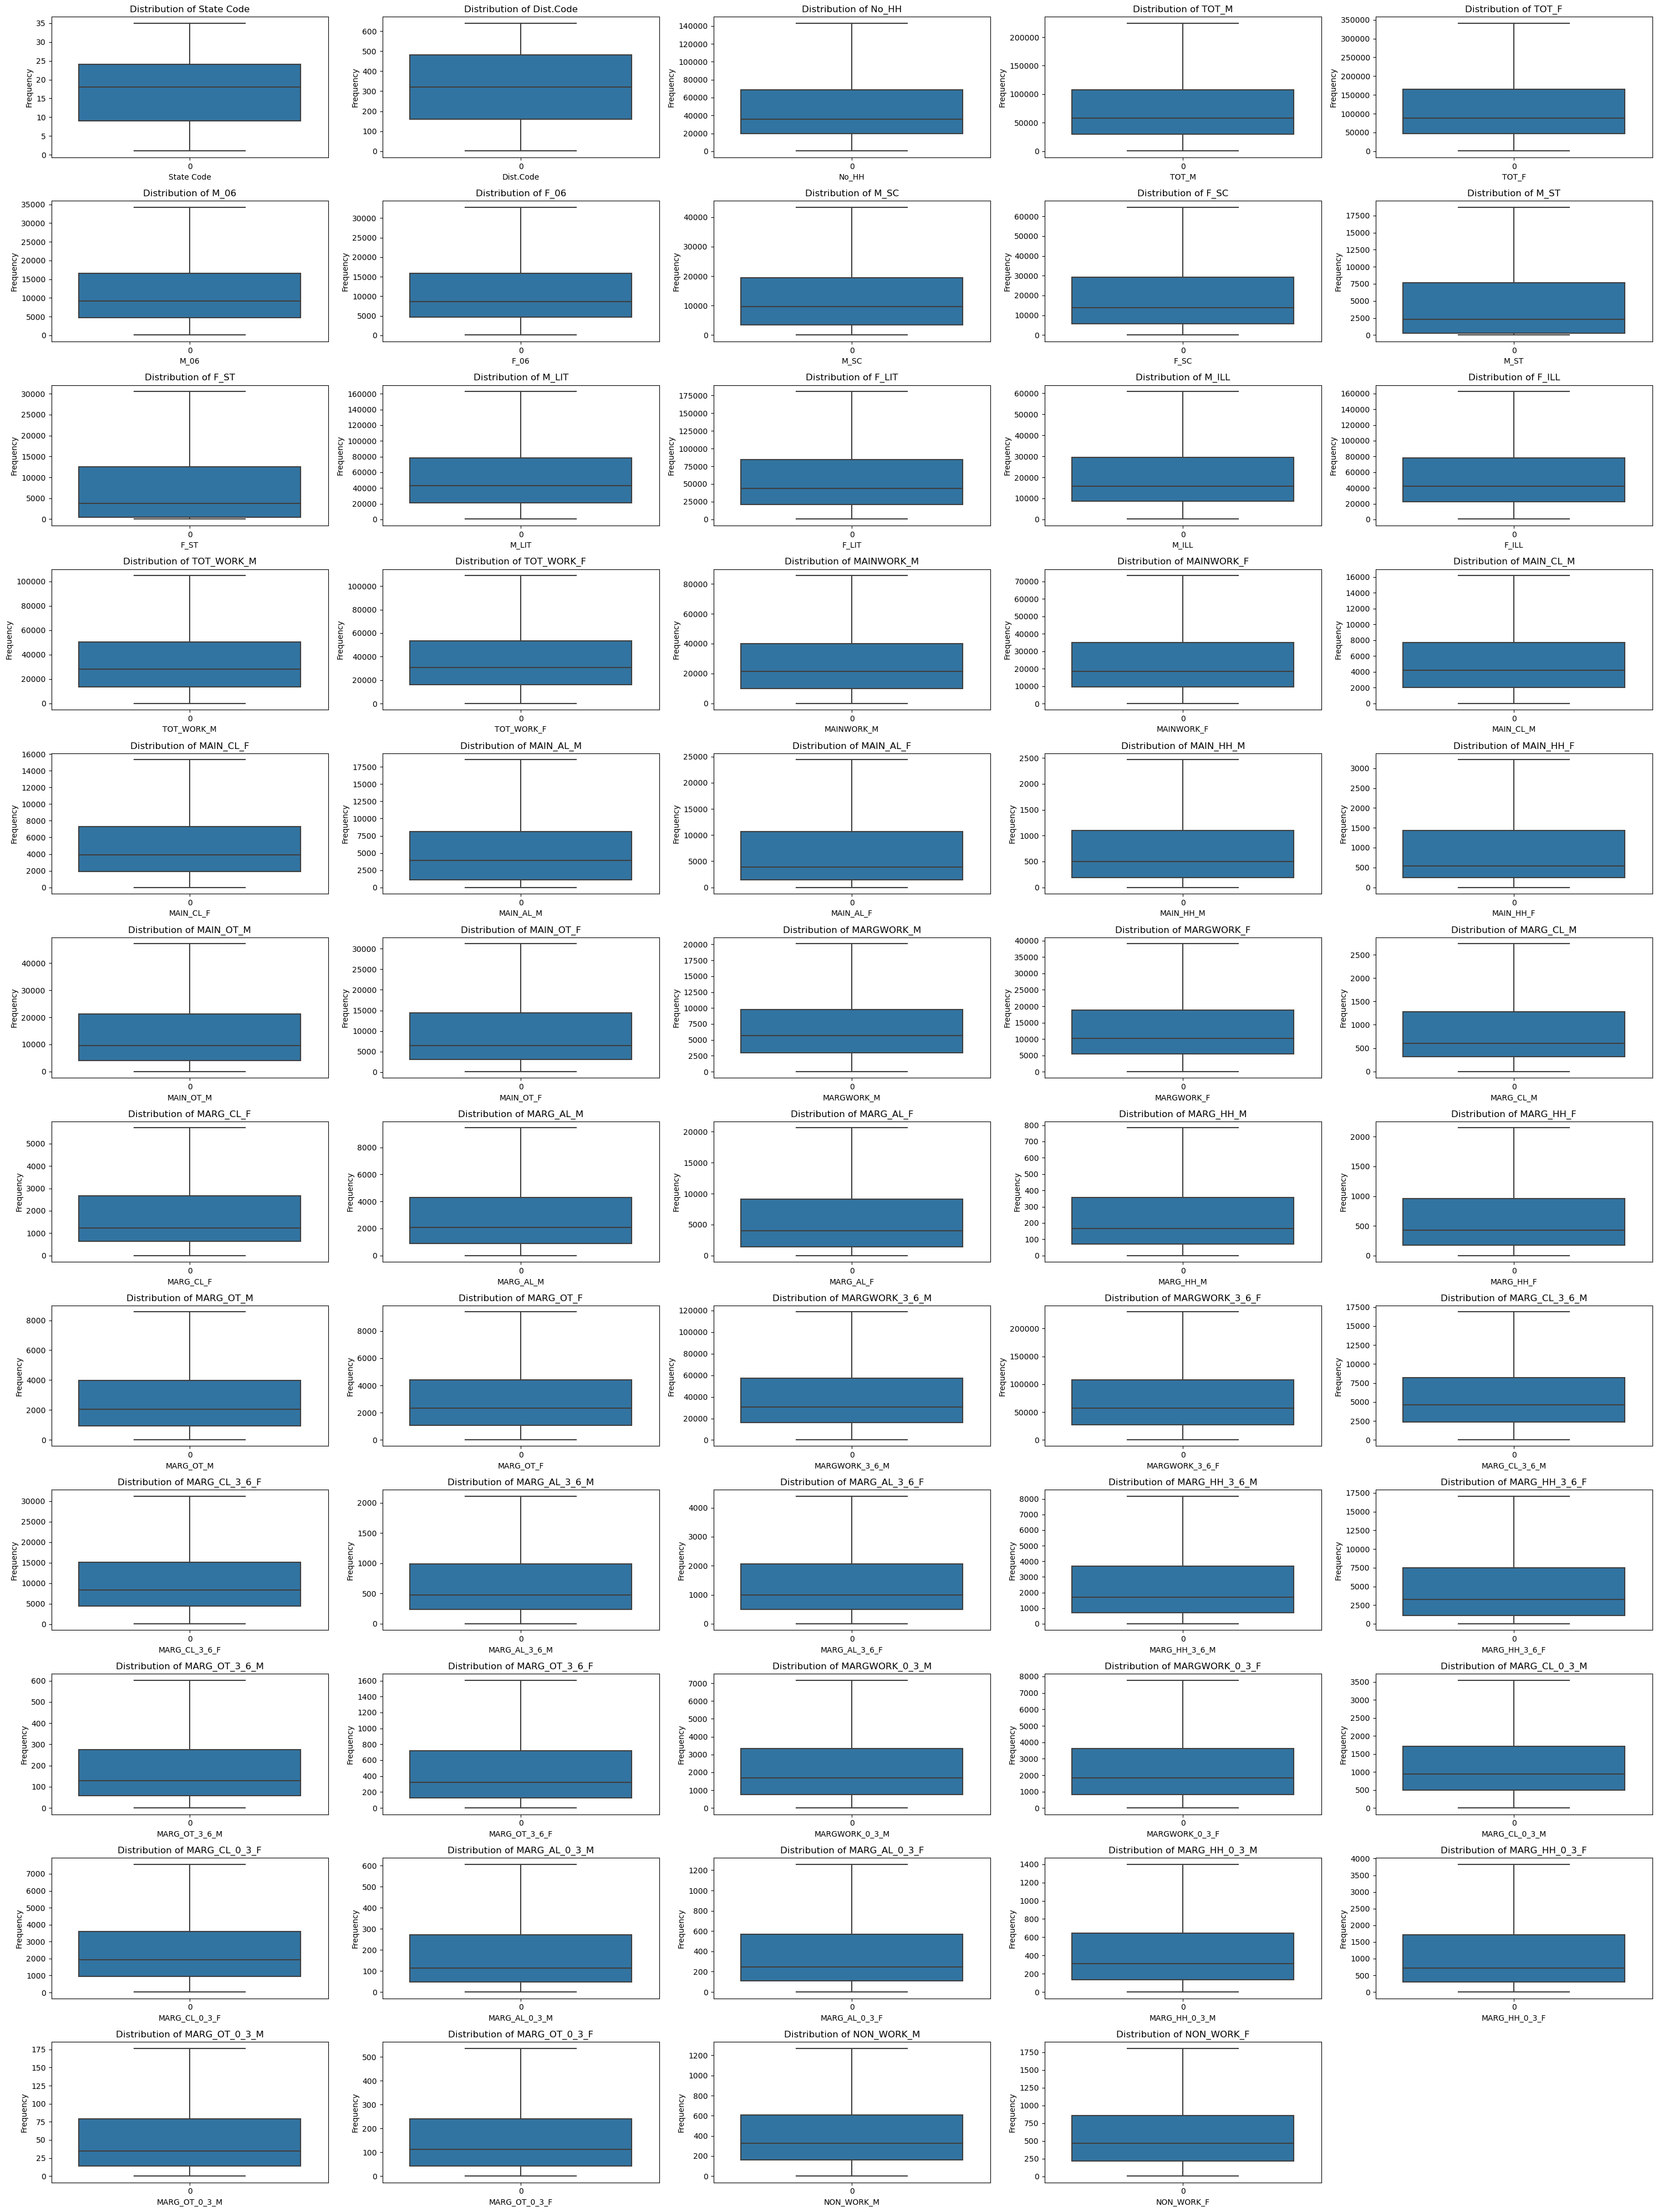

In [24]:
plt.figure(figsize=(30, 40))


n_cols = 5


for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // n_cols + 1, n_cols, i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

### Data Scaling

In [25]:
columns_to_drop = ['State Code', 'Dist.Code', 'State', 'Area Name']


new_df = df.drop(columns=columns_to_drop)

new_df.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707.0,23388.0,29796.0,5862.0,6196.0,3.0,0.0,1999.0,2598.0,13381.0,...,1150.0,749.0,180.0,237.0,680.0,252.0,32.0,46.0,258.0,214.0
1,6218.0,19585.0,23102.0,4482.0,3733.0,7.0,6.0,427.0,517.0,10513.0,...,525.0,715.0,123.0,229.0,186.0,148.0,76.0,178.0,140.0,160.0
2,4452.0,6546.0,10964.0,1082.0,1018.0,3.0,6.0,5806.0,9723.0,4534.0,...,114.0,188.0,44.0,89.0,3.0,34.0,0.0,4.0,67.0,61.0
3,1320.0,2784.0,4206.0,563.0,677.0,0.0,0.0,2666.0,3968.0,1842.0,...,194.0,247.0,61.0,128.0,13.0,50.0,4.0,10.0,116.0,59.0
4,11654.0,20591.0,29981.0,5157.0,4587.0,20.0,33.0,7670.0,10843.0,13243.0,...,874.0,1928.0,465.0,1043.0,205.0,302.0,24.0,105.0,180.0,478.0


In [26]:
from scipy.stats import zscore
data_scaled=new_df.apply(zscore)
data_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


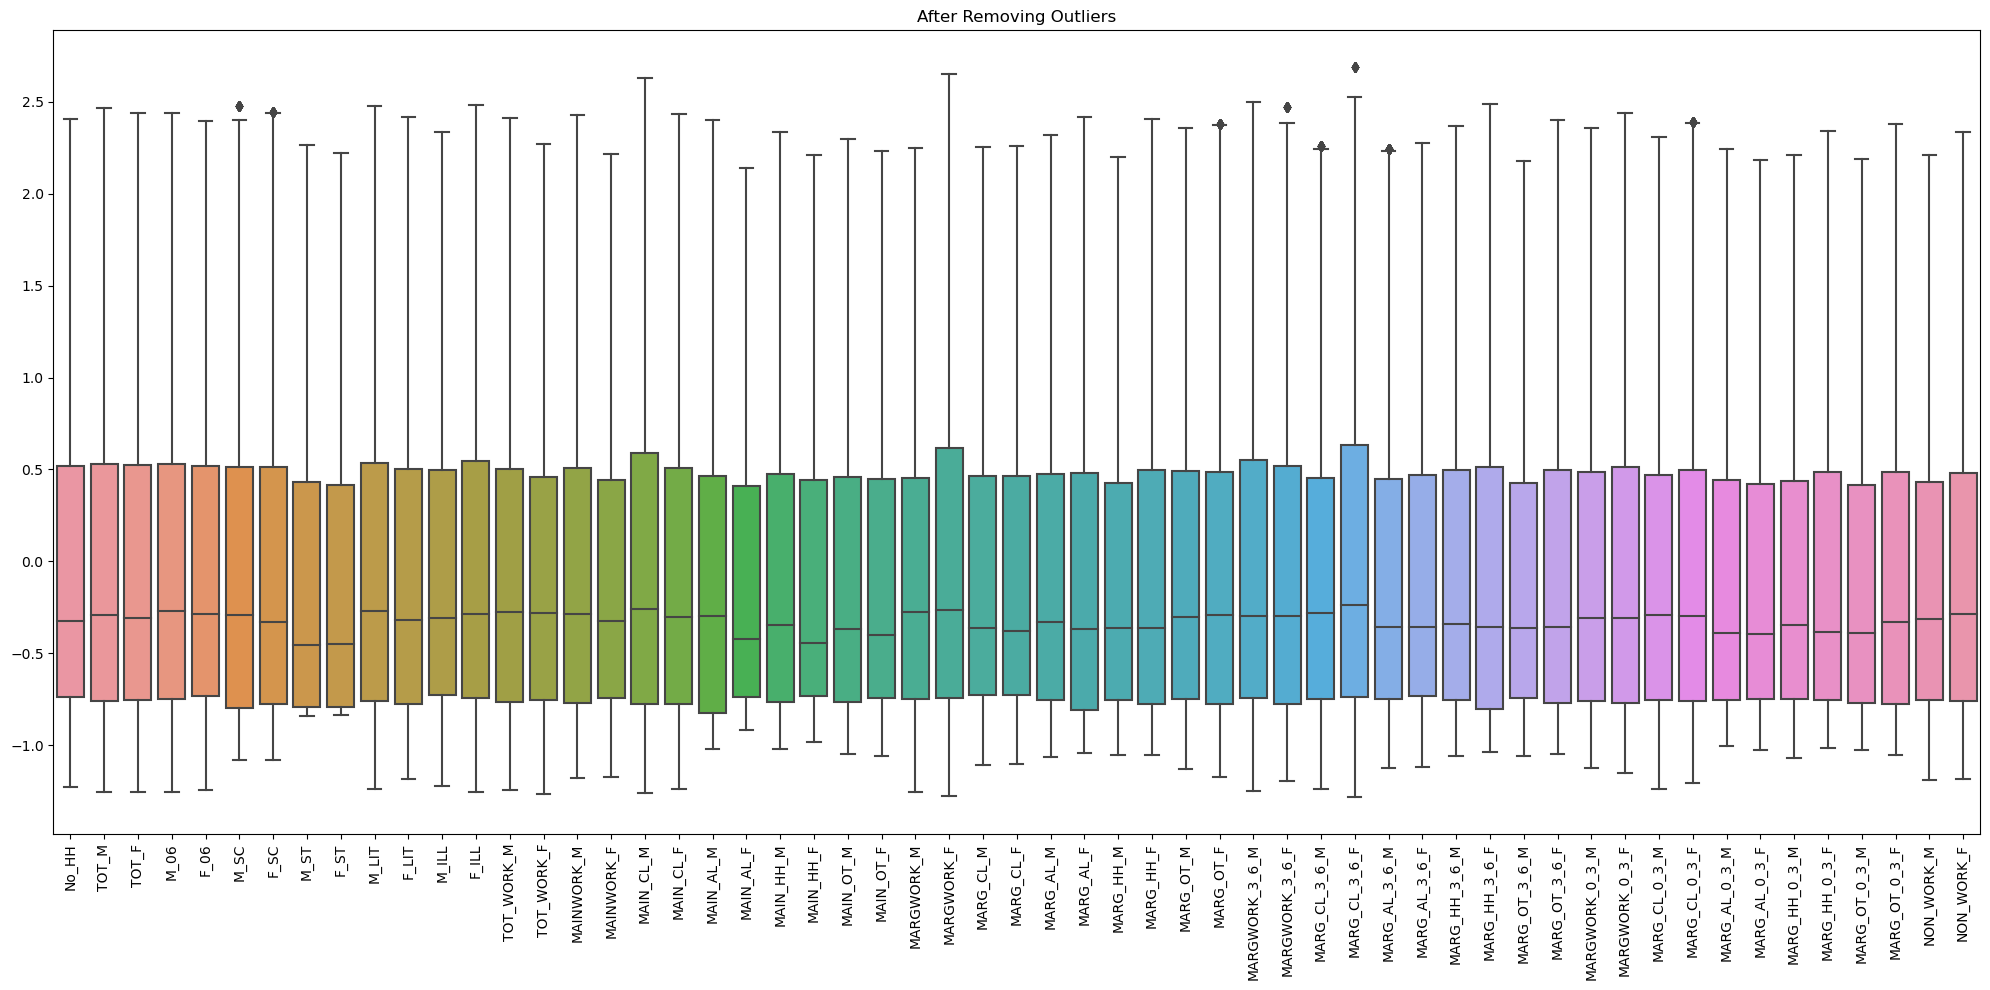

In [27]:
plt.figure(figsize=(20, 10))


sns.boxplot(data=data_scaled)
plt.title('After Removing Outliers')
plt.xticks(rotation=90) 


plt.tight_layout()

plt.show()

After applying scaling techniques, the impact on outliers is observed in the boxplots. Although scaling adjusts the data to a standard scale, outliers remain present in the dataset. However, their representation changes; instead of being shown as absolute values, outliers are now depicted in terms of how many standard deviations they deviate from the mean. This standardized perspective helps in understanding the relative extremity of outliers within the context of the scaled data distribution.

## PCA

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [28]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_scaled)
p_value

0.0

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [29]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_scaled)
kmo_model

0.9361896166652829

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
df_pca = pca.fit_transform(data_scaled)
df_pca.transpose().round(2)

array([[-5.53, -5.49, -7.47, ..., -7.89, -7.86, -7.42],
       [ 0.43, -0.11, -0.22, ..., -1.  , -1.  , -1.41],
       [-1.47, -2.02, -0.25, ..., -0.91, -0.85, -0.87],
       ...,
       [ 0.01, -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
       [ 0.  ,  0.01, -0.  , ...,  0.  , -0.  , -0.  ],
       [ 0.  , -0.01,  0.  , ..., -0.  ,  0.  ,  0.  ]])

In [31]:
cov_matrix = np.cov(data_scaled.T)
cov_matrix

array([[1.00156495, 0.91269889, 0.973013  , ..., 0.65276151, 0.76840117,
        0.79788409],
       [0.91269889, 1.00156495, 0.98012187, ..., 0.7328315 , 0.86616581,
        0.79071666],
       [0.973013  , 0.98012187, 1.00156495, ..., 0.71187751, 0.83964667,
        0.81464163],
       ...,
       [0.65276151, 0.7328315 , 0.71187751, ..., 1.00156495, 0.76249106,
        0.72075284],
       [0.76840117, 0.86616581, 0.83964667, ..., 0.76249106, 1.00156495,
        0.90224595],
       [0.79788409, 0.79071666, 0.81464163, ..., 0.72075284, 0.90224595,
        1.00156495]])

In [32]:
print('Eigenvalues:\n', pca.explained_variance_.round(2))

Eigenvalues:
 [3.565e+01 7.640e+00 3.770e+00 2.780e+00 1.910e+00 1.150e+00 9.900e-01
 4.600e-01 4.000e-01 3.200e-01 2.700e-01 2.400e-01 1.800e-01 1.700e-01
 1.400e-01 1.300e-01 1.000e-01 1.000e-01 9.000e-02 8.000e-02 7.000e-02
 6.000e-02 5.000e-02 5.000e-02 4.000e-02 3.000e-02 3.000e-02 3.000e-02
 2.000e-02 2.000e-02 2.000e-02 2.000e-02 1.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]


In [33]:
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.15  0.16  0.16 ...  0.14  0.15  0.14]
 [-0.12 -0.08 -0.09 ...  0.04 -0.05 -0.04]
 [ 0.1  -0.04  0.03 ... -0.1  -0.13 -0.03]
 ...
 [ 0.   -0.01  0.02 ... -0.01  0.06 -0.01]
 [ 0.    0.05  0.   ...  0.01 -0.08 -0.  ]
 [-0.   -0.    0.01 ...  0.    0.01  0.  ]]


In [34]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.62 0.13 0.07 0.05 0.03 0.02 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [35]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 62.44  75.83  82.44  87.3   90.64  92.66  94.39  95.21  95.9   96.47
  96.95  97.36  97.68  97.97  98.22  98.45  98.63  98.79  98.95  99.09
  99.2   99.31  99.4   99.48  99.55  99.61  99.66  99.71  99.75  99.79
  99.82  99.85  99.87  99.89  99.91  99.93  99.94  99.95  99.96  99.97
  99.98  99.98  99.98  99.99  99.99  99.99  99.99 100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


The cumulative variance percentage exceeds 90% starting from the 5th component, which explains 90.64%.

To identify the optimum number of principal components (PCs), we can use the scree plot. The scree plot shows the eigenvalues of each PC in descending order, with the corresponding proportion of explained variance. We can plot the eigenvalues against the PCs and observe where the eigenvalues start to level off. 

### Scree plot

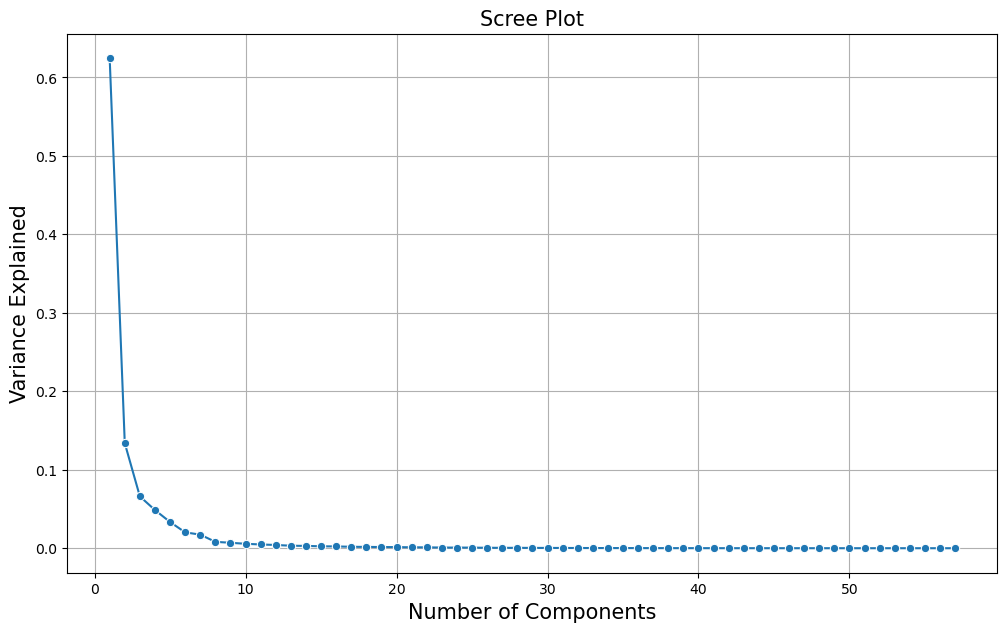

In [36]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

From the scree plot, it is evident that the first 5 principal components account for a substantial portion of the total variance in the data. Notably, the first principal component explains the largest amount of variance, with the subsequent components also contributing significantly but to a lesser extent.

In [37]:

from sklearn.decomposition import PCA
# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 57 to 8)
pca = PCA(n_components=5, random_state=123)
df_pca = pca.fit_transform(data_scaled)
df_pca.transpose().round(2) # Component output

array([[-5.53, -5.49, -7.47, ..., -7.89, -7.86, -7.42],
       [ 0.43, -0.11, -0.22, ..., -1.  , -1.  , -1.41],
       [-1.47, -2.02, -0.25, ..., -0.91, -0.85, -0.87],
       [-1.28, -1.75,  0.01, ..., -1.24, -0.78, -0.68],
       [ 0.38, -0.01,  0.56, ...,  0.15, -0.08,  0.1 ]])

In [38]:
df_pca.shape

(640, 5)

In [39]:
pca.components_.round(2)

array([[ 0.15,  0.16,  0.16,  0.16,  0.16,  0.14,  0.14,  0.02,  0.02,
         0.16,  0.15,  0.15,  0.16,  0.15,  0.14,  0.14,  0.13,  0.11,
         0.08,  0.12,  0.09,  0.14,  0.13,  0.12,  0.12,  0.16,  0.15,
         0.09,  0.07,  0.13,  0.12,  0.15,  0.14,  0.15,  0.15,  0.16,
         0.16,  0.16,  0.15,  0.09,  0.07,  0.13,  0.11,  0.15,  0.14,
         0.15,  0.15,  0.14,  0.13,  0.06,  0.06,  0.12,  0.11,  0.14,
         0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, -0.02, -0.01, -0.08, -0.09,  0.07,  0.07,
        -0.11, -0.13, -0.01, -0.02, -0.12, -0.08, -0.17, -0.14,  0.04,
         0.1 , -0.05, -0.07, -0.1 , -0.11, -0.2 , -0.21,  0.08,  0.11,
         0.27,  0.28,  0.16,  0.14,  0.04,  0.01, -0.07, -0.09, -0.04,
        -0.09,  0.07,  0.09,  0.26,  0.27,  0.15,  0.12,  0.04, -0.  ,
        -0.08, -0.1 ,  0.14,  0.17,  0.28,  0.29,  0.18,  0.18,  0.05,
         0.04, -0.05, -0.04],
       [ 0.1 , -0.04,  0.03, -0.07, -0.07, -0.04,  0.02,  0.32,  0.34,
        -0.03, -0

In [40]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [41]:
pca.explained_variance_ratio_.round(2)

array([0.62, 0.13, 0.07, 0.05, 0.03])

Let's create a dataframe of component loading against each field and identify the pattern

In [42]:
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(new_df))
df_pca_loading.shape

(5, 57)

In [43]:
df_pca_loading.head(8)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.15,0.16,0.16,0.16,0.16,0.14,0.14,0.02,0.02,0.16,...,0.14,0.13,0.06,0.06,0.12,0.11,0.14,0.14,0.15,0.14
1,-0.12,-0.08,-0.09,-0.02,-0.01,-0.08,-0.09,0.07,0.07,-0.11,...,0.14,0.17,0.28,0.29,0.18,0.18,0.05,0.04,-0.05,-0.04
2,0.10,-0.04,0.03,-0.07,-0.07,-0.04,0.02,0.32,0.34,-0.03,...,-0.10,0.03,-0.12,-0.09,0.03,0.16,-0.14,-0.10,-0.13,-0.03
3,0.08,0.05,0.07,0.03,0.02,0.01,0.02,0.09,0.08,0.09,...,-0.02,0.01,0.21,0.24,-0.24,-0.19,-0.17,-0.17,0.02,0.06
4,-0.01,-0.04,-0.02,-0.08,-0.08,-0.17,-0.16,0.42,0.42,-0.01,...,0.09,0.11,-0.02,-0.04,0.02,0.05,0.01,0.05,0.19,0.25


In [44]:
from matplotlib.patches import Rectangle

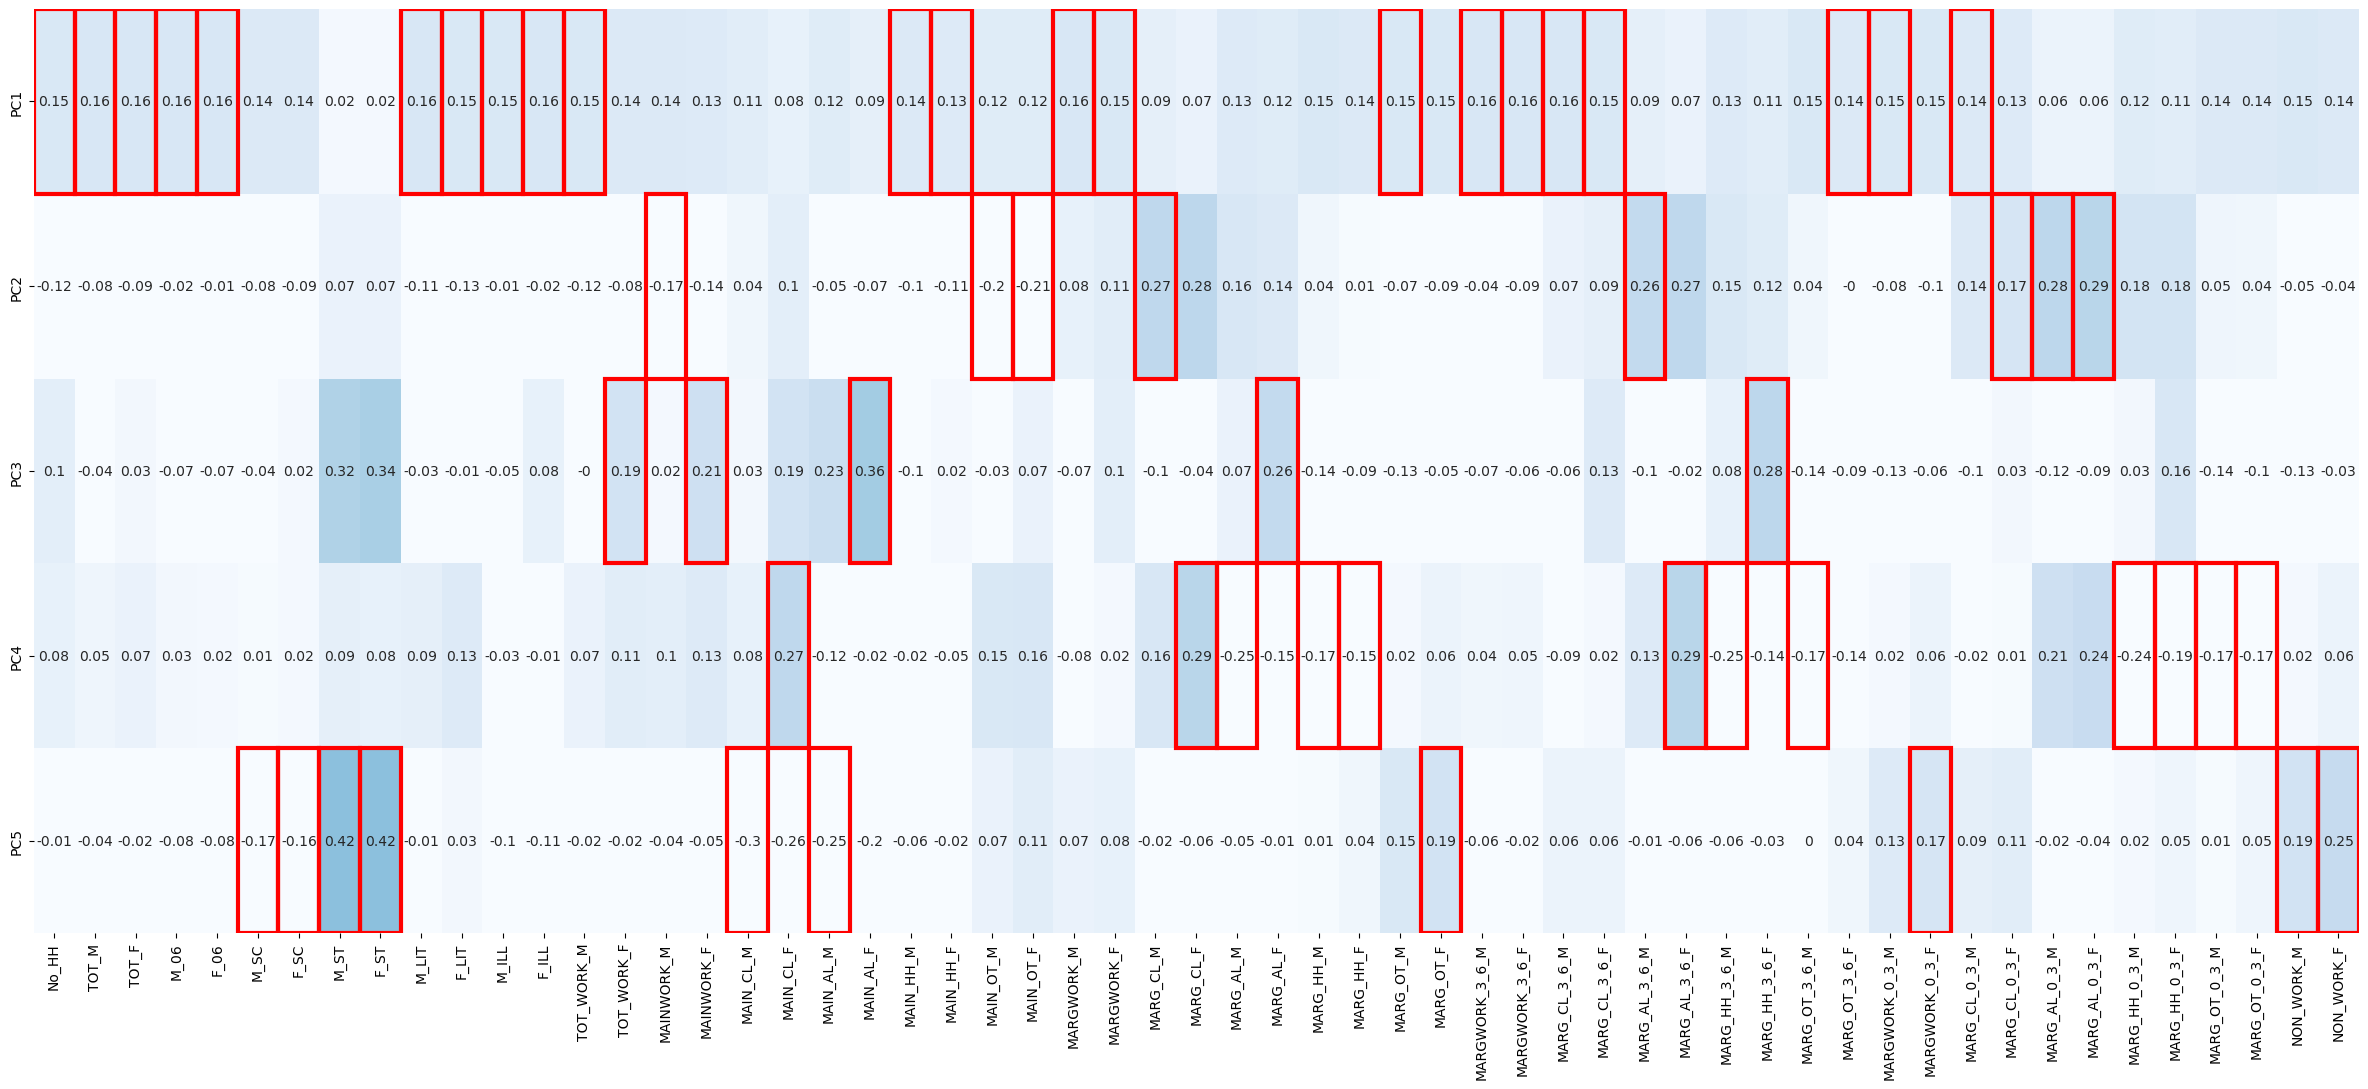

In [45]:
fig,ax = plt.subplots(figsize=(30, 12), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

The interpretation of the principal components involves identifying which variables have the strongest correlations with each component. This is determined by examining the magnitude of the loadings, i.e., how far these numbers are from zero in either direction. Deciding which magnitudes are considered large or small is inherently subjective. Therefore, we need to establish a threshold for when a correlation is deemed significant.

















































The first principal component (PC1) exhibits all positive loadings, indicating that it captures a general trend in the data where most variables contribute positively.ost features fall within the loading range of 0.11 to 0.16. The most significant features in PC1 include No_HH,TOT_M,TOT_F,M_06,F_06,M_LIT,F_LIT,M_ILL,TOT_WORK_M,F_ILL,MARG_CL_3_6_F,MAIN_HH_M,MAIN_HH_F,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_M,MARGWORK_F,MARG_OT_M,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_0_3_M,MARG_CL_3_6_M.

Features like MAINWORK_M, MAIN_OT_M,MAIN_OT_F, MARG_CL_M, MARG_AL_3_6_M,MARG_CL_0_3_F, MARG_AL_0_3_M,MARG_AL_0_3_F exhibit relatively high loadings, indicating a strong influence on PC2.

Significant features include TOT_WORK_F,MAINWORK_F,MAIN_AL_F,MARG_AL_F,MARG_HH_3_6_F, suggesting these variables are key influencers of PC3.

Features such as MARG_CL_F,MAIN_CL_F,MARG_AL_M,MARG_HH_M,MARG_HH_F,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_OT_3_6_M,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F contribute significantly to PC4.

Features like M_SC,F_SC,M_ST,F_ST,MAIN_CL_M,MAIN_AL_M,MARG_OT_F,MARGWORK_0_3_F,NON_WORK_M,NON_WORK_F have relatively high loadings, making them critical to the composition of PC5.